In [1]:
#1.kutuphaneler

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble
from pandas.plotting import scatter_matrix
from sklearn import model_selection

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/wine-customer-segmentation/Wine.csv


     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

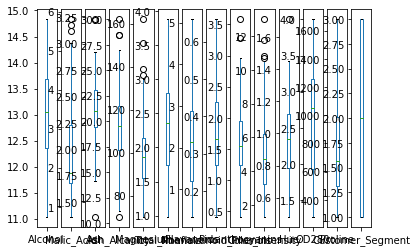

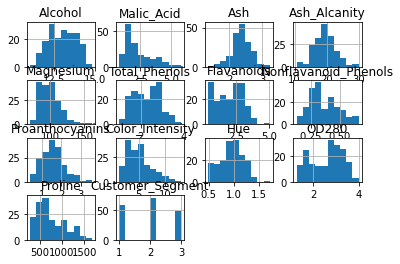

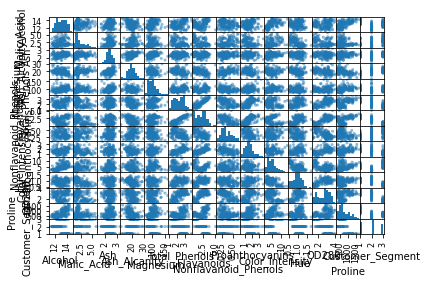

In [2]:

#2.veri onisleme
#2.1.veri yukleme
veriler = pd.read_csv('../input/wine-customer-segmentation/Wine.csv')


print(veriler)
#box graph
#plt kısaltması matplotlib kütüphanesinin kısaltması olarak kullanılır.
#subplot: grafiklerin düzlemini ve kaçıncı grafik olduğunu gösterir.
veriler.plot(kind="box",subplots=True, sharex=False, sharey=False)
plt.show()

#histogram
veriler.hist()
plt.show()

scatter_matrix(veriler)
plt.show()

In [3]:
#Veriyi eğitim ve test olarak ayıracağım.
# train/test
#eğitim ve test olarak ayırmak için genel yaklaşım: %70-80 eğitim, %30-20 test 

X=veriler.values[:,0:4]
Y=veriler.values[:,4]

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.25, random_state=7)
print("veri seti:")
print(veriler)

veri seti:
     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06    

LOGISTIC REGRESSION

In [4]:
#Lojistik regresyon, ikili sonuç veren binary değişkenlerin modellenmesinde kullanılmaktadır


def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
#Yukarıda gördüğünüz kod FutureWarning hatası için kullanıldı.


from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)
#Accuracy(Doğruluk): Sistemde doğru olarak yapılan tahminlerin tüm tahminlere oranıdır. 
print('lr accuracy :', lr.score(X_test,Y_test))

# confusion matrix
#Modelin başarı metrikleri: Confusion matrix
#Hata Matrisi ( Confusion Matrix) makine öğrenmesinde kullandığımız sınıflandırma modelinin performansını hesaplarken kullanılıyor.
#Burada True Positive-TP , True Negative-TN, False Positive – FP ve False Negative-FN isminde kavramlar var.
#Eğer sonucu doğru olan bir şey doğru tahmin edilirse True Positive olarak adlandırılıken sonucu yanlış olan bir şey doğru olarak tahmin edilirse buna True Negative deniliyor. 
#Aynı şekilde sonucu yanlış olan bir şey doğru olarak tahmin edilirse False Positive, sonucu yanlış olan bir şey yanlış olarak tahmin edilirse False negative deniliyor.
y_pred = lr.predict(X_test)
y_true = Y_test
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_true,y_pred)

lr accuracy : 0.06666666666666667


K-Nearest Neighbors

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
#n_neighbors=3 (En yakın 3 komşu içerisindeki yoğunluğa göre karar verecek) 
knn.fit(X_train,Y_train)
print('knn accuracy :',knn.score(X_test,Y_test))

# confisioun matrix
#Modelin başarı metrikleri: Confusion matrix
y_pred = knn.predict(X_test)
y_true = Y_test

from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_true,y_pred)

knn accuracy : 0.022222222222222223


Find best k value

bk accuracy : 0.022222222222222223


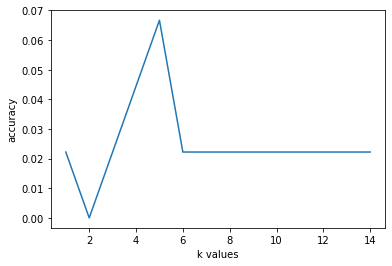

In [6]:
score_list=[]
for each in range(1,15):
    knn2=KNeighborsClassifier(n_neighbors=each)
    knn2.fit(X_train,Y_train)
    score_list.append(knn2.score(X_test,Y_test))
#Accuracy(Doğruluk): Sistemde doğru olarak yapılan tahminlerin tüm tahminlere oranıdır. 
print('bk accuracy :', knn2.score(X_test,Y_test))
plt.plot(range(1,15),score_list)
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.show()

# confisioun matrix
#Modelin başarı metrikleri: Confusion matrix
y_pred = knn2.predict(X_test)
y_true = Y_test

from sklearn.metrics import confusion_matrix
cm_knn2 = confusion_matrix(y_true,y_pred)


SVM

In [7]:
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(X_train,Y_train)
#Accuracy(Doğruluk): Sistemde doğru olarak yapılan tahminlerin tüm tahminlere oranıdır. 
print('svm accuracy :', svm.score(X_test,Y_test))

# confisuon matrix
y_pred = svm.predict(X_test)
y_true = Y_test
from sklearn.metrics import confusion_matrix

cm_svm = confusion_matrix(y_true,y_pred)

svm accuracy : 0.08888888888888889


Naive Bayes

In [8]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,Y_train)
#Accuracy(Doğruluk): Sistemde doğru olarak yapılan tahminlerin tüm tahminlere oranıdır. 
print('nb accuracy : ', nb.score(X_test,Y_test))

# confisuon matrix
y_pred = nb.predict(X_test)
y_true = Y_test
from sklearn.metrics import confusion_matrix

cm_nb = confusion_matrix(y_true,y_pred)

nb accuracy :  0.022222222222222223


Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
#Accuracy(Doğruluk): Sistemde doğru olarak yapılan tahminlerin tüm tahminlere oranıdır. 
print('dt.accuracy : ', nb.score(X_test,Y_test))

# confisuon matrix
y_pred = dt.predict(X_test)
y_true = Y_test
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_true,y_pred)

dt.accuracy :  0.022222222222222223


Simdi az once uyguladigim modelleri cross-validation ile uygulayip gorelim.

In [10]:
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 


wine_dataset = pd.read_csv("../input/wine-customer-segmentation/Wine.csv")

x=wine_dataset.values[:,0:4]
y=wine_dataset.values[:,4]

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(x, y, test_size=0.25, random_state=7)

#uygulanacak modelleri models içine koydum.
models=[
    ("lR", LogisticRegression()),
    ("KNN",KNeighborsClassifier()),
    ("KN",KNeighborsClassifier()),
    ("SVM",SVC()),
    ("Naive Bayes",GaussianNB()),
    ("DT",DecisionTreeClassifier()),
]
results=[]
names=[]

In [11]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
#Yukarıda gördüğünüz kod FutureWarning hatası için kullanıldı.




#K herhangi bir sayı olabilir, ancak genellikle K = 10 önerilir
#Dengesiz bir veri kümesiyle uğraşıyorsanız, tahmin edilen özelliklerin sınıflarını dengeleyebilir.
#Hiperparametre Ayarı: Çapraz Doğrulama, algoritmanın verimliliğini artırmak için hiperparametrelerin optimum değerini bulmaya yardımcı olur

for name,model in models:
    kfold=model_selection.KFold(n_splits=10,random_state=7)
    cv_results=model_selection.cross_val_score(model,X_train,Y_train,cv=kfold,scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)" %(name, cv_results.mean(), cv_results.std()))
   



lR: 0.044505 (0.048430)
KNN: 0.037363 (0.037411)
KN: 0.037363 (0.037411)
SVM: 0.022527 (0.034441)
Naive Bayes: 0.021978 (0.046363)
DT: 0.029670 (0.050069)


NEDEN CROSS-VALIDATION KULLANMALIYIZ?

Çapraz doğrulama (cross-validation) ise parametre ayarlama sırasında eğitim setinin her seferinde farklı bir kısmı ile doğrulama yapma işlemine denir. Örnek ile açıklamak gerekirse, veri setinin seçilen orandaki kısmı test seti olarak ayrıldıktan sonra kalan kısmın ilk %25’lik kısmını ilk model eğitiminde, ikinci %25’lik kısmını ikinci model eğitiminde… şeklinde sırası ile uygulanarak tüm kısımlar hem doğrulama hem eğitim sırasında kullanılır. Bu sayede doğrulama setinin doğru şekilde seçilip seçilmediği kaygısı ortadan kalkar, parametre seçimi ise her bir çapraz doğrulama (cross-validation) seti ve eğitim (training) seti ile ölçülen metrik skorlarının (hata, doğruluk, f1 vs.) ortalaması alınarak yapılır.

**Makine Öğrenmesinde Çapraz Doğrulama ve Test**

Makine öğrenmesinde modelleri eğitirken beklenti kullanılan veriyle en iyi genellemeyi yapmasıdır. Eğer eğitilen model yine eğitim sırasında kullanılan veri ile test edilirse model kullanılan veriye overfitting (aşırı uyum) mi yoksa iyi bir genelleme mi anlayamayız.
Çapraz doğrulama (cross-validation) parametre ayarlama sırasında eğitim setinin her seferinde farklı bir kısmı ile doğrulama yapma işlemidir. Örnek ile açıklamak gerekirse, veri setinin seçilen orandaki kısmı test seti olarak ayrıldıktan sonra kalan kısmın ilk %25’lik kısmını ilk model eğitiminde, ikinci %25’lik kısmını ikinci model eğitiminde… şeklinde sırası ile uygulanarak tüm kısımlar hem doğrulama hem eğitim sırasında kullanılır. Bununla birlikte doğrulama setinin doğru şekilde seçilip seçilmediği kaygısı ortadan kalkar, parametre seçimi ise her bir çapraz doğrulama (cross-validation) seti ve eğitim (training) seti ile ölçülen metrik skorlarının (hata, doğruluk, f1 vs.) ortalaması alınarak yapılır.